## Geographic Visualisations

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [20]:
sns.set(rc={'figure.figsize': (15,7)})

In [60]:
!pip install geopandas

notebook 6.0.2 has requirement jupyter-client>=5.3.4, but you'll have jupyter-client 5.3.3 which is incompatible.
notebook 6.0.2 has requirement jupyter-core>=4.6.0, but you'll have jupyter-core 4.4.0 which is incompatible.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [117]:
!pip install descartes

notebook 6.0.2 has requirement jupyter-client>=5.3.4, but you'll have jupyter-client 5.3.3 which is incompatible.
notebook 6.0.2 has requirement jupyter-core>=4.6.0, but you'll have jupyter-core 4.4.0 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import geopandas as gpd

In [5]:
gb = gpd.read_file('../../geo_data/PostalArea.shp')
gb_dists = gpd.read_file('../../geo_data/PostalDistrict.shp')
gb_sects = gpd.read_file('../../geo_data/PostalSector.shp')

In [6]:
#An alternative shape file located which may have more detailed postal code polygons
edinburgh = gpd.read_file('../../edinburgh/edin_postcodes/FrozenPostcode2011GridReferences.shp')

In [7]:
gb.head()

,AreaID,PostArea,AreaName,PCCnt,RefPC,x,y,Sprawl,geometry
0,1,AB,Aberdeen,16591,AB510JY,380801,823302,Aberdeen,"MULTIPOLYGON (((414084.362 845858.375, 414080...."
1,2,AL,St Albans,7764,AL49HQ,518400,210241,St Albans,"POLYGON ((528615.681 207505.032, 528610.750 20..."
2,3,B,Birmingham,41503,B120UF,407660,285144,Birmingham,"POLYGON ((430268.493 309809.457, 430215.263 30..."
3,4,BA,Bath,14838,BA113RD,370585,147293,Bath,"POLYGON ((403898.512 140274.626, 403595.910 14..."
4,5,BB,Blackburn,13036,BB55US,377550,432035,Blackburn,"POLYGON ((397131.543 438071.073, 397124.073 43..."


In [8]:
edin_shape = gb.loc[gb['AreaName']=='Edinburgh']
edin_shape.head()

,AreaID,PostArea,AreaName,PCCnt,RefPC,x,y,Sprawl,geometry
32,34,EH,Edinburgh,23831,EH105LG,323354,670686,Edinburgh,"MULTIPOLYGON (((375449.729 673903.686, 375402...."


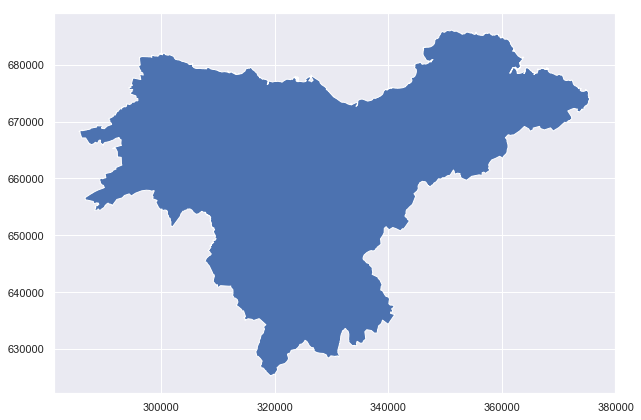

In [21]:

edin_shape.plot()


In [22]:
gb_dists.head(2)

,DistID,PostDist,PostArea,DistNum,PCCnt,AnomCnt,RefPC,x,y,Sprawl,Locale,geometry
0,1,AB10,AB,10,725,2,AB106HA,392949,805109,Aberdeen,None,"POLYGON ((392500.960 805927.935, 392536.991 80..."
1,2,AB11,AB,11,660,1,AB115QH,394404,805438,Aberdeen,None,"MULTIPOLYGON (((397283.458 805385.540, 397279...."


In [23]:
gb_sects.head(2)

,SectID,RMSect,GISSect,StrSect,PostDist,PostArea,DistNum,SecNum,PCCnt,AnomCnt,RefPC,x,y,Sprawl,Locale,geometry
0,1,AB10 1,AB10 1,AB101,AB10,AB,10,1,266,0,AB101TH,393574,806073,Aberdeen,None,"POLYGON ((392500.960 805927.935, 392536.991 80..."
1,2,AB10 6,AB10 6,AB106,AB10,AB,10,6,243,3,AB106PS,392796,805097,Aberdeen,None,"POLYGON ((391878.013 804752.011, 391878.203 80..."


In [24]:
edin_dists = gb_dists.loc[gb_dists['Sprawl']=='Edinburgh']
edin_dists.head(2)

,DistID,PostDist,PostArea,DistNum,PCCnt,AnomCnt,RefPC,x,y,Sprawl,Locale,geometry
688,689,EH1,EH,1,326,0,EH11BL,325688,673712,Edinburgh,Old Town,"POLYGON ((324508.097 673513.308, 324552.200 67..."
689,690,EH10,EH,10,866,0,EH106EW,324424,670314,Edinburgh,Morningside,"POLYGON ((323985.987 669321.038, 323968.977 66..."


In [25]:
edin_dists.shape

(17, 12)

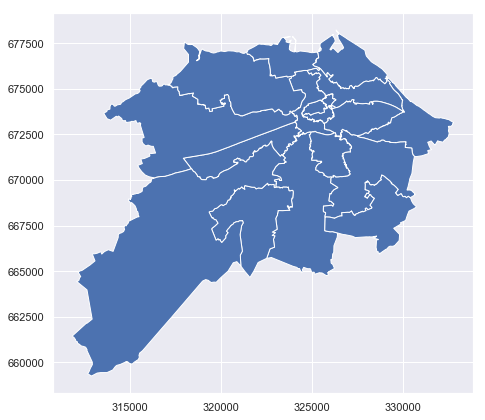

In [26]:

edin_dists.plot()

In [27]:
edin_sects = gb_sects.loc[gb_sects['Sprawl']=='Edinburgh']
edin_sects.head(10)

,SectID,RMSect,GISSect,StrSect,PostDist,PostArea,DistNum,SecNum,PCCnt,AnomCnt,RefPC,x,y,Sprawl,Locale,geometry
2491,2492,EH1 1,EH 1 1,EH11,EH1,EH,1,1,131,0,EH11QY,325885,673554,Edinburgh,Old Town,"POLYGON ((325519.956 673396.941, 325530.954 67..."
2492,2493,EH1 2,EH 1 2,EH12,EH1,EH,1,2,106,0,EH12NH,325294,673408,Edinburgh,Old Town,"POLYGON ((324508.097 673513.308, 324552.200 67..."
2493,2494,EH1 3,EH 1 3,EH13,EH1,EH,1,3,89,0,EH13JU,325930,674432,Edinburgh,New Town,"POLYGON ((325557.998 674358.986, 325572.988 67..."
2494,2495,EH2 1,EH 2 1,EH21,EH2,EH,2,1,61,0,EH21DJ,325328,674161,Edinburgh,New Town,"POLYGON ((325557.998 674358.986, 325571.965 67..."
2495,2496,EH2 2,EH 2 2,EH22,EH2,EH,2,2,65,0,EH22QA,325398,673955,Edinburgh,New Town,"POLYGON ((324990.969 673757.998, 324999.948 67..."
2496,2497,EH2 3,EH 2 3,EH23,EH2,EH,2,3,40,0,EH23ES,325014,673967,Edinburgh,New Town,"POLYGON ((324898.962 674087.994, 324925.957 67..."
2497,2498,EH2 4,EH 2 4,EH24,EH2,EH,2,4,70,0,EH24ET,324712,673765,Edinburgh,New Town,"POLYGON ((324583.976 673844.023, 324580.093 67..."
2498,2499,EH3 5,EH 3 5,EH35,EH3,EH,3,5,168,0,EH35NP,324925,675091,Edinburgh,Stockbridge,"POLYGON ((323865.007 675690.035, 323999.970 67..."
2499,2500,EH3 6,EH 3 6,EH36,EH3,EH,3,6,173,0,EH36JL,325108,674414,Edinburgh,New Town,"POLYGON ((324378.979 674021.942, 324388.948 67..."
2500,2501,EH3 7,EH 3 7,EH37,EH3,EH,3,7,81,0,EH37JA,324302,673667,Edinburgh,West End,"POLYGON ((323909.002 673708.042, 323946.006 67..."


In [28]:
edin_sects.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 66 entries, 2491 to 2558
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   SectID    66 non-null     int64   
 1   RMSect    66 non-null     object  
 2   GISSect   66 non-null     object  
 3   StrSect   66 non-null     object  
 4   PostDist  66 non-null     object  
 5   PostArea  66 non-null     object  
 6   DistNum   66 non-null     object  
 7   SecNum    66 non-null     int64   
 8   PCCnt     66 non-null     int64   
 9   AnomCnt   66 non-null     int64   
 10  RefPC     66 non-null     object  
 11  x         66 non-null     int64   
 12  y         66 non-null     int64   
 13  Sprawl    66 non-null     object  
 14  Locale    65 non-null     object  
 15  geometry  66 non-null     geometry
dtypes: geometry(1), int64(6), object(9)
memory usage: 8.8+ KB


In [29]:
edin_sects.RefPC.nunique() #So we have only unique postcodes within our edin_sects dataset. 

66

In [30]:
edin_sects.Locale.nunique()

33

In [31]:
edin_sects.RefPC.unique()

array(['EH11QY', 'EH12NH', 'EH13JU', 'EH21DJ', 'EH22QA', 'EH23ES',
       'EH24ET', 'EH35NP', 'EH36JL', 'EH37JA', 'EH38AQ', 'EH39JR',
       'EH41EJ', 'EH42NG', 'EH43JH', 'EH44QR', 'EH45PA', 'EH46DF',
       'EH47DU', 'EH48BJ', 'EH51PB', 'EH52JB', 'EH53JT', 'EH64QP',
       'EH65NZ', 'EH66HB', 'EH67JG', 'EH68FE', 'EH74JX', 'EH75PJ',
       'EH76JH', 'EH87JA', 'EH88DU', 'EH89HG', 'EH91UE', 'EH92EG',
       'EH93BW', 'EH104DW', 'EH105LT', 'EH106JL', 'EH107BW', 'EH111BN',
       'EH112LT', 'EH113QD', 'EH114NT', 'EH125PT', 'EH126JD', 'EH127JY',
       'EH128BN', 'EH129DQ', 'EH130DS', 'EH139BW', 'EH141LJ', 'EH142QR',
       'EH143BS', 'EH145LJ', 'EH146AH', 'EH147EG', 'EH151NB', 'EH152JA',
       'EH153LL', 'EH164ED', 'EH165XG', 'EH166JU', 'EH177HE', 'EH178HU'],
      dtype=object)

In [32]:
edin_sects.shape

(66, 16)

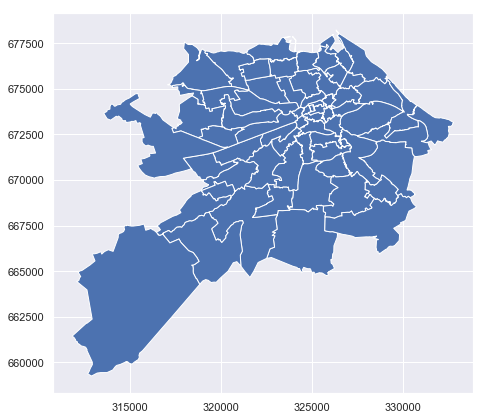

In [33]:
edin_sects.plot()

## Create Heat Maps to illustrate quantity and best_rated restaurants in an area

1. Create a dataframe that cam link postcode and restaurant count in that area

2. Create a datafram that can link postcode and average restaurant rating in that area

In [34]:
post_code = edin_sects.loc[edin_sects['RefPC']=='EH12NH'] #test we can access and plot indidual post code shapes. 
post_code

,SectID,RMSect,GISSect,StrSect,PostDist,PostArea,DistNum,SecNum,PCCnt,AnomCnt,RefPC,x,y,Sprawl,Locale,geometry
2492,2493,EH1 2,EH 1 2,EH12,EH1,EH,1,2,106,0,EH12NH,325294,673408,Edinburgh,Old Town,"POLYGON ((324508.097 673513.308, 324552.200 67..."


In [35]:
post_code_2 = edin_sects.loc[edin_sects['RefPC'].str.contains('EH8')] #test we can access and plot indidual post code shapes. 
post_code_2

,SectID,RMSect,GISSect,StrSect,PostDist,PostArea,DistNum,SecNum,PCCnt,AnomCnt,RefPC,x,y,Sprawl,Locale,geometry
2522,2523,EH8 7,EH 8 7,EH87,EH8,EH,8,7,232,0,EH87JA,328764,673717,Edinburgh,Meadowbank,"POLYGON ((326660.981 673504.950, 326729.003 67..."
2523,2524,EH8 8,EH 8 8,EH88,EH8,EH,8,8,115,0,EH88DU,326815,673918,Edinburgh,Old Town,"POLYGON ((326328.928 673975.166, 326334.955 67..."
2524,2525,EH8 9,EH 8 9,EH89,EH8,EH,8,9,213,0,EH89HG,326267,672915,Edinburgh,Old Town,"POLYGON ((325700.976 673120.960, 325747.956 67..."


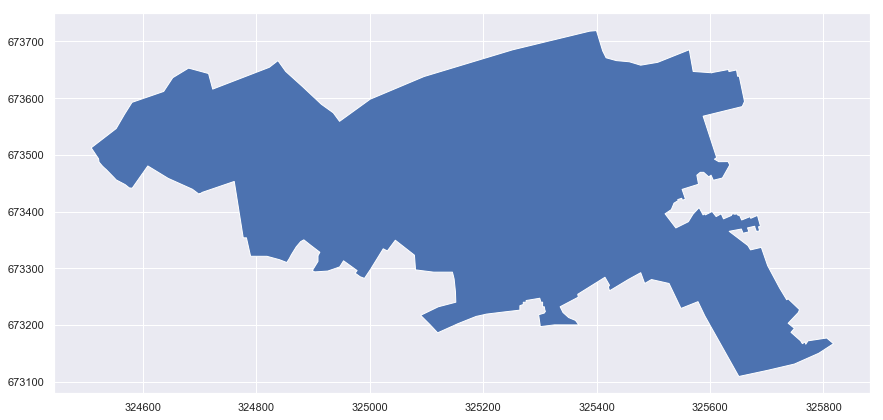

In [36]:
post_code.plot()

1. 
We want the business dataframe filtered for edinburgh and restaurants as previously executed. (Except we have reinitiated here as our previous set was infected with restaurants from mEDINa!)

In [62]:
df_biz = pd.read_csv('../../yelp_data/yelp_business.csv')

In [63]:
df_biz.drop(columns='neighborhood', inplace=True) #We know from our main EDA notebook that this is a NaN col!! 

In [64]:
edin_pc = df_biz[df_biz['city'].str.contains('Edinburgh', case=False, na=False)]
# edin = df_biz[df_biz.city.str.contains('Edin',case=False, na=False)]
print(edin_pc.shape)
edin_pc.head()

(3873, 12)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
68,F31RycVVooeIOp9jsXmg6g,"""The Bluebird Cafe""","""5 Canonmills""",Edinburgh,MLN,EH3 5HA,55.962444,-3.197662,4.5,16,1,Breakfast & Brunch;Diners;Restaurants;Cafes;Br...
214,KbSoYXHUz_Bjo-v0VWHDrw,"""St. Andrew Square""","""St Andrew Sq""",Edinburgh,EDH,EH1 1,55.953860,-3.191788,4.5,14,1,Active Life;Parks;Local Flavor
353,3gM8zh_OaubYXNnQNxAYKQ,"""Planet X""","""74 South Clerk Street""",Edinburgh,EDH,EH8,55.939643,-3.180275,2.5,3,1,Sports Wear;Sporting Goods;Shopping;Bikes;Fashion
380,inaACfObL1NBNJmBG11iuQ,"""Global Deli""","""13 George IV Bridge, Old Town""",Edinburgh,EDH,EH1 1EE,55.947960,-3.192143,4.0,13,1,Restaurants;Food;Sandwiches;Coffee & Tea;Delis
397,Di5ApLgoQpcv5Aew82fI_A,"""The Rendezvous""","""10 Queensferry Street""",Edinburgh,EDH,EH2 4PG,55.950550,-3.209454,3.5,19,1,Restaurants;Cantonese;Chinese


In [65]:
edin_rest_pc = edin_pc[edin_pc.categories.str.contains('Rest', case=False, na=False)]
print(edin_rest_pc.shape)
edin_rest_pc.head(2)

(1504, 12)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
68,F31RycVVooeIOp9jsXmg6g,"""The Bluebird Cafe""","""5 Canonmills""",Edinburgh,MLN,EH3 5HA,55.962444,-3.197662,4.5,16,1,Breakfast & Brunch;Diners;Restaurants;Cafes;Br...
380,inaACfObL1NBNJmBG11iuQ,"""Global Deli""","""13 George IV Bridge, Old Town""",Edinburgh,EDH,EH1 1EE,55.947960,-3.192143,4.0,13,1,Restaurants;Food;Sandwiches;Coffee & Tea;Delis


In [66]:
#Let's check how many unique postcodes we've got in the restaurant set
edin_rest_pc.postal_code.nunique()

748

In [67]:
edin_rest_pc.postal_code.unique()

array(['EH3 5HA', 'EH1 1EE', 'EH2 4PG', 'EH3 9BE', 'EH2 2NH', 'EH6 6JJ',
       'EH1 2QN', 'EH7 4EB', 'EH3 7NG', 'EH2 4SH', 'EH11 1BY', 'EH2 4JZ',
       'EH10 7AZ', 'EH1 3NH', 'EH1 1QS', 'EH5 1PD', 'EH6 8', 'EH2 4NF',
       'EH1 3SA', 'EH10 4QJ', 'EH1 2HS', 'EH1 1DH', 'EH9 1JJ', 'EH6 6QN',
       'EH6 8SA', 'EH3 5AL', 'EH15 2AN', 'EH7 5AP', 'EH3 9AZ', 'EH3 7LW',
       'EH9 1QE', 'EH7 4BN', 'EH1 1EN', 'EH3 8EA', 'EH2 1EL', 'EH6 6SH',
       'EH1 1SX', 'EH8 9JB', 'EH1 2QH', 'EH6 4PG', 'EH3 5LF', 'EH9 1QW',
       'EH1 1BQ', 'EH1 3RJ', 'EH1 2JU', 'EH15 1LH', 'EH2 2AA', 'EH2 2',
       'EH7 4AA', 'EH8 9DB', 'EH7 5JU', 'EH8 8BQ', 'EH2 2DL', 'EH2 1HJ',
       'EH16 5AD', 'EH10 4HP', 'EH3 5AN', 'EH15 3RH', 'EH2 3', 'EH6 6LX',
       'EH1 1AD', 'EH2 1LH', 'EH8 9ET', 'EH2 2BD', 'EH3 9', 'EH3 7TH',
       'EH1 2LP', 'EH9 1JT', 'EH9 1PY', 'EH9 1QR', 'EH12 9DJ', 'KY13 0QJ',
       'EH1 3SB', 'EH14 2EZ', 'EH8 9BX', 'EH1 2ED', 'EH6 5', 'EH6 5BX',
       'EH7 4NY', 'EH1 2PB', 'EH1 3RH', 'EH7 4AF',

In [68]:
postal_c = edin_rest_pc.loc[edin_rest_pc['postal_code'].str.contains('EH8', na=False)] #test we can access and plot indidual post code shapes. 
print(postal_c.nunique(), postal_c.postal_code.unique())

business_id     173
name            171
address         157
city              1
state             2
postal_code      77
latitude        161
longitude       162
stars             6
review_count     46
is_open           2
categories      151
dtype: int64 ['EH8 9JB' 'EH8 9DB' 'EH8 8BQ' 'EH8 9ET' 'EH8 9BX' 'EH8 9DH' 'EH8 9AA'
 'EH8 9BZ' 'EH8 9JD' 'EH8 8AA' 'EH8 9NE' 'EH8 9JN' 'EH8 9' 'EH8 8AU'
 'EH8 9PT' 'EH8 9EH' 'EH8 9ER' 'EH8 9LS' 'EH8 9EF' 'EH8 9EZ' 'EH8 9AL'
 'EH8 8DD' 'EH8 9TU' 'EH8 9JQ' 'EH8 9BJ' 'EH8 9TX' 'EH8 9JG' 'EH8 9AJ'
 'EH8 9HX' 'EH8 9TT' 'EH8 7RU' 'EH8 8FS' 'EH8 9PS' 'EH8 9AY' 'EH8 9PR'
 'EH8' 'EH8 9BT' 'EH8 9NZ' 'EH8 9BH' 'EH8 9DD' 'EH8 9DZ' 'EH8 9QY'
 'EH8 9PZ' 'EH8 9NG' 'EH8 8BZ' 'EH8 8' 'EH8 8BS' 'EH8 7AD' 'EH8 9EA'
 'EH8 9DA' 'EH8 9LP' 'EH8 9JH' 'EH8 9FT' 'EH8 8AB' 'EH8 7RW' 'EH8 9NH'
 'EH8 8DL' 'EH8 8DQ' 'EH8 9JP' 'EH8 7AW' 'EH8 9DT' 'EH8 9QN' 'EH8 9SH'
 'EH8 9NQ' 'EH8 9BY' 'EH8 9TG' 'EH8 8AE' 'EH8 8AF' 'EH8 9HL' 'EH8 7NG'
 'EH8 9QR' 'EH8 9BU' 'EH8 9PY' 'EH8 9JW' 'EH8

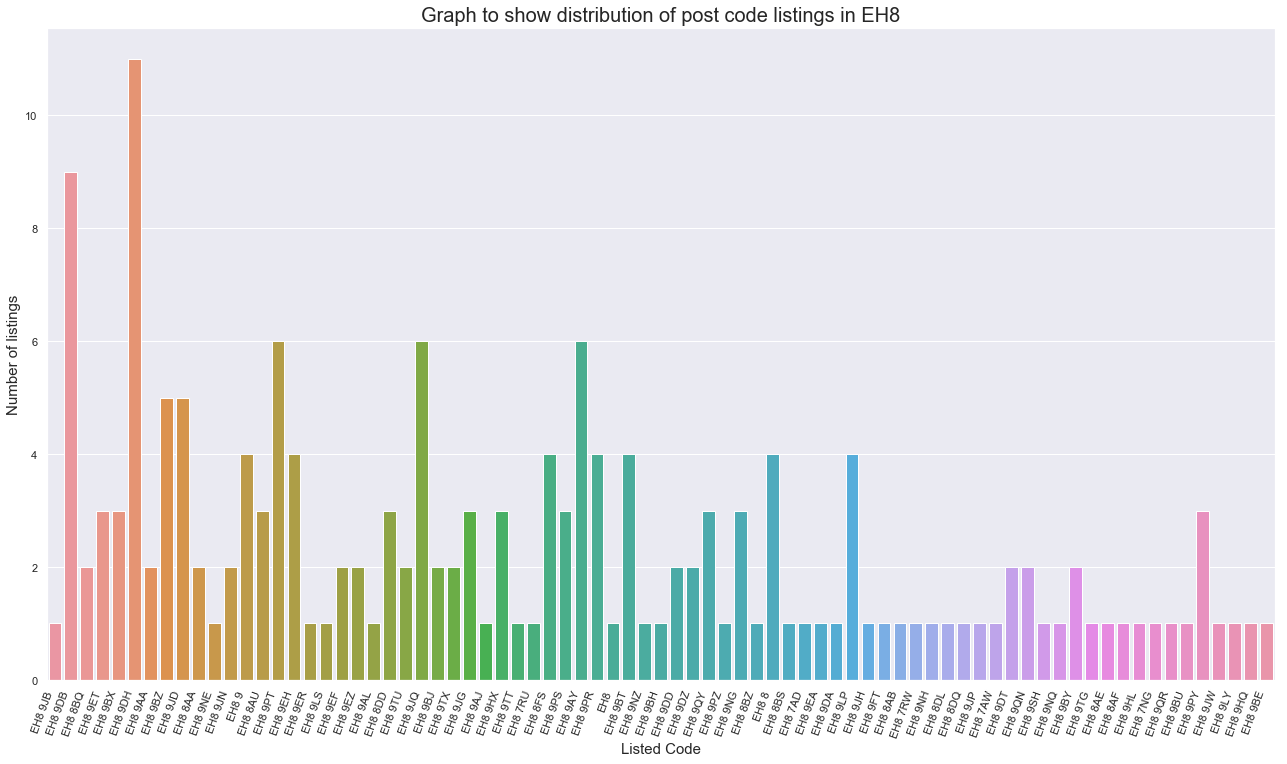

In [69]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (22,12)})
sns.countplot(x='postal_code', data=postal_c)#.set_title("Graph to show distribution of ratings")
plt.title('Graph to show distribution of post code listings in EH8', fontsize=20)
plt.ylabel('Number of listings', fontsize=15)
plt.xlabel('Listed Code', fontsize=15)
plt.xticks(rotation=70, ha='right');
plt.show()

We can see that most of the codes are fully formed but we have one 3character 'EH8' and five more 4 character'EH8 X'\
I don't really want to reduce the comparison to just the first three characters of a postcode but we also have the problem that we have 748 unique post codes in our business set but only 66 unique postcode/shape files. 


Let's investigate the less favourable option of just using the first part of a postcode to merge the data sets. To do this we'll have to create a new column in our edi_rest_pc dataframe that holds this information. As follows: 

In [70]:
edin_rest_pc['postal_area'] = edin_rest_pc.postal_code.str[:3]
print('There are {} unique postal areas in the business dataset'.format(edin_rest_pc.postal_area.nunique()))
print('The postal areas are: {}'.format(edin_rest_pc.postal_area.unique()))
edin_rest_pc.head(3)

There are 10 unique postal areas in the business dataset
The postal areas are: ['EH3' 'EH1' 'EH2' 'EH6' 'EH7' 'EH5' 'EH9' 'EH8' 'KY1' 'EH4' nan]


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,postal_area
68,F31RycVVooeIOp9jsXmg6g,"""The Bluebird Cafe""","""5 Canonmills""",Edinburgh,MLN,EH3 5HA,55.962444,-3.197662,4.5,16,1,Breakfast & Brunch;Diners;Restaurants;Cafes;Br...,EH3
380,inaACfObL1NBNJmBG11iuQ,"""Global Deli""","""13 George IV Bridge, Old Town""",Edinburgh,EDH,EH1 1EE,55.947960,-3.192143,4.0,13,1,Restaurants;Food;Sandwiches;Coffee & Tea;Delis,EH1
397,Di5ApLgoQpcv5Aew82fI_A,"""The Rendezvous""","""10 Queensferry Street""",Edinburgh,EDH,EH2 4PG,55.950550,-3.209454,3.5,19,1,Restaurants;Cantonese;Chinese,EH2


We can see that there are som NaN values in the new postal area column. Let's check how many and if we can get rid of them. We also don't really want to keep the KY postcode as it's on the otherside of the river to Edinburgh so not really any good for our purposes. 

In [71]:
edin_rest_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504 entries, 68 to 174527
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   1504 non-null   object 
 1   name          1504 non-null   object 
 2   address       1504 non-null   object 
 3   city          1504 non-null   object 
 4   state         1504 non-null   object 
 5   postal_code   1502 non-null   object 
 6   latitude      1504 non-null   float64
 7   longitude     1504 non-null   float64
 8   stars         1504 non-null   float64
 9   review_count  1504 non-null   int64  
 10  is_open       1504 non-null   int64  
 11  categories    1504 non-null   object 
 12  postal_area   1502 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 164.5+ KB


In [72]:
edin_rest_pc.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     2
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
categories      0
postal_area     2
dtype: int64

In [73]:
edin_rest_pc.dropna(inplace=True)

In [74]:
print('The postal areas are: {}'.format(edin_rest_pc.postal_area.unique()))
#This also got rid of the KY1 postal_area which is good!!

The postal areas are: ['EH3' 'EH1' 'EH2' 'EH6' 'EH7' 'EH5' 'EH9' 'EH8' 'KY1' 'EH4']


In [77]:
#Let's check into how many times the KY1 postcode occurs?
kyl_count = edin_rest_pc.postal_area.value_counts()['KY1']
kyl_count

2

In [78]:
edin_rest_pc = edin_rest_pc[edin_rest_pc.postal_area != 'KY1']
print('The postal areas are: {}'.format(edin_rest_pc.postal_area.unique()))

The postal areas are: ['EH3' 'EH1' 'EH2' 'EH6' 'EH7' 'EH5' 'EH9' 'EH8' 'EH4']


Cool! We now have only valid postcodes even if it's not the full set of codes that we'd like to be working with

So we now need to join the edin_sects (col=PostDist) dataframe to the edn_rest_pc (col=postal_area) dataframe. Let's reduce the 2 sets down into the minimum required cols so they're easy to work with. 

In [79]:
#Create the first df from our business dataframe
dfx = edin_rest_pc[['business_id', 'name', 'latitude', 'longitude', 'postal_area', 'stars', 'review_count']]
dfx.head()

,business_id,name,latitude,longitude,postal_area,stars,review_count
68,F31RycVVooeIOp9jsXmg6g,"""The Bluebird Cafe""",55.962444,-3.197662,EH3,4.5,16
380,inaACfObL1NBNJmBG11iuQ,"""Global Deli""",55.947960,-3.192143,EH1,4.0,13
397,Di5ApLgoQpcv5Aew82fI_A,"""The Rendezvous""",55.950550,-3.209454,EH2,3.5,19
420,OvbLKXkJCg8ZMHX9L5faIA,"""Bread Meats Bread""",55.946390,-3.205829,EH3,4.0,28
446,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",55.952835,-3.198560,EH2,3.0,24


In [80]:
dfx.shape

(1500, 7)

In [81]:
dfx.nunique()

business_id     1500
name            1400
latitude        1384
longitude       1386
postal_area        9
stars              9
review_count     100
dtype: int64

In [82]:
#Create the second df from our Districts shapefile dataframe
edin_dists.head()

,DistID,PostDist,PostArea,DistNum,PCCnt,AnomCnt,RefPC,x,y,Sprawl,Locale,geometry
688,689,EH1,EH,1,326,0,EH11BL,325688,673712,Edinburgh,Old Town,"POLYGON ((324508.097 673513.308, 324552.200 67..."
689,690,EH10,EH,10,866,0,EH106EW,324424,670314,Edinburgh,Morningside,"POLYGON ((323985.987 669321.038, 323968.977 66..."
690,691,EH11,EH,11,932,0,EH113HT,321777,671790,Edinburgh,Wester Hailes,"POLYGON ((324111.963 673254.942, 324111.979 67..."
691,692,EH12,EH,12,1332,0,EH126NR,320396,672805,Edinburgh,Costorphine,"POLYGON ((313576.985 673670.943, 313747.995 67..."
692,693,EH13,EH,13,370,0,EH130AF,322383,668883,Edinburgh,Colinton,"POLYGON ((323056.974 669609.006, 323096.988 66..."


In [83]:
#This dataframe is appropriate as it contains the district shapefiles that we are interested in
edin_dists.PostDist.unique() 

array(['EH1', 'EH10', 'EH11', 'EH12', 'EH13', 'EH14', 'EH15', 'EH16',
       'EH17', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9'],
      dtype=object)

In [84]:
edin_dists.PostDist.value_counts()

EH15    1
EH4     1
EH12    1
EH8     1
EH16    1
EH9     1
EH11    1
EH3     1
EH2     1
EH14    1
EH7     1
EH17    1
EH5     1
EH6     1
EH10    1
EH13    1
EH1     1
Name: PostDist, dtype: int64

In [88]:
dfy = edin_dists[['DistID', 'PostDist', 'Locale', 'geometry', 'x', 'y']]
dfy.head(20)

,DistID,PostDist,Locale,geometry,x,y
688,689,EH1,Old Town,"POLYGON ((324508.097 673513.308, 324552.200 67...",325688,673712
689,690,EH10,Morningside,"POLYGON ((323985.987 669321.038, 323968.977 66...",324424,670314
690,691,EH11,Wester Hailes,"POLYGON ((324111.963 673254.942, 324111.979 67...",321777,671790
691,692,EH12,Costorphine,"POLYGON ((313576.985 673670.943, 313747.995 67...",320396,672805
692,693,EH13,Colinton,"POLYGON ((323056.974 669609.006, 323096.988 66...",322383,668883
693,694,EH14,Wester Hailes,"POLYGON ((315523.000 667999.966, 315489.971 66...",319785,669259
694,695,EH15,Duddingston,"POLYGON ((327523.975 672441.945, 327644.007 67...",330877,673112
695,696,EH16,Liberton,"POLYGON ((326448.011 669583.973, 326401.996 66...",327885,670496
696,697,EH17,Liberton,"POLYGON ((325751.040 667974.454, 325999.958 66...",328653,668821
699,700,EH2,New Town,"POLYGON ((325557.998 674358.986, 325571.965 67...",325167,673961


In [86]:
geo_df = dfy.merge(dfx, how='left', left_on='PostDist', right_on='postal_area')
print(geo_df.shape) #We have 8 more records than unique businesses!! we need to remove some rows. 
geo_df.tail(50)

(1508, 13)


,DistID,PostDist,Locale,geometry,x,y,business_id,name,latitude,longitude,postal_area,stars,review_count
1458,742,EH9,Newington,"POLYGON ((324946.973 672625.952, 324998.200 67...",326006,671722,nQ82g4W8piVOeFZa6dKQpQ,"""Hot Kungfu""",55.938958,-3.179624,EH9,4.5,3.0
1459,742,EH9,Newington,"POLYGON ((324946.973 672625.952, 324998.200 67...",326006,671722,L9DejSwWe6NRJOKgXJB07Q,"""The Links""",55.937616,-3.202815,EH9,4.0,6.0
1460,742,EH9,Newington,"POLYGON ((324946.973 672625.952, 324998.200 67...",326006,671722,RAwkEXVb-Tu1s-g0gNy7JA,"""Hellers Kitchen""",55.937124,-3.178645,EH9,4.0,27.0
1461,742,EH9,Newington,"POLYGON ((324946.973 672625.952, 324998.200 67...",326006,671722,tNUEKYfbwL0VBU-yfWQrUA,"""Good Year Chinese Restaurant""",55.933536,-3.177991,EH9,3.5,6.0
1462,742,EH9,Newington,"POLYGON ((324946.973 672625.952, 324998.200 67...",326006,671722,MJ2Llajfj8DS3zyCJim1rw,"""Toast""",55.935392,-3.194150,EH9,4.0,40.0
1463,742,EH9,Newington,"POLYGON ((324946.973 672625.952, 324998.200 67...",326006,671722,ZwrdQ9ZF1sgCa2TJ_NiOuw,"""The Royal Dick Bar""",55.939286,-3.182133,EH9,4.5,11.0
1464,742,EH9,Newington,"POLYGON ((324946.973 672625.952, 324998.200 67...",326006,671722,0RGUYLMLFwy_05iiY4kiTA,"""Delhi Diner""",55.931251,-3.172070,EH9,4.0,4.0
1465,742,EH9,Newington,"POLYGON ((324946.973 672625.952, 324998.200 67...",326006,671722,8IqZUA5qPR0O2MlVTOVSSQ,"""Grange Takeaway""",55.935498,-3.179898,EH9,3.5,5.0
1466,742,EH9,Newington,"POLYGON ((324946.973 672625.952, 324998.200 67...",326006,671722,ce00GkdpzJbDLmoSavSnsQ,"""Tony's Fish Bar""",55.934723,-3.178786,EH9,3.5,3.0
1467,742,EH9,Newington,"POLYGON ((324946.973 672625.952, 324998.200 67...",326006,671722,pTbbbCOZLS_2dOB3pyI0DQ,"""Metropole - Cafe & Bistro""",55.938771,-3.178749,EH9,3.5,17.0


Actually, on a second look we can see that the extra rows are just the polygon rows that we don't have any restaurant data for. We should still include them to complete the picture as we currently understand it and to give a true reflection of the data we have at our disposal. 

In [87]:
#First let's remove the nulls which correspond to postal sectors with no business in them. 
geo_df.isna().sum() 

DistID          0
PostDist        0
Locale          0
geometry        0
x               0
y               0
business_id     8
name            8
latitude        8
longitude       8
postal_area     8
stars           8
review_count    8
dtype: int64

In [89]:
# geo_df.dropna(inplace=True)
# geo_df.shape 
geo_df.fillna(0, inplace=True)
print(geo_df.isna().sum()) #Nans replaced with zeros to keep the rows in the set. 
geo_df.shape

DistID          0
PostDist        0
Locale          0
geometry        0
x               0
y               0
business_id     0
name            0
latitude        0
longitude       0
postal_area     0
stars           0
review_count    0
dtype: int64


(1508, 13)

In [254]:
#Let's look for duplicated business id's
# geo_df.pivot_table(index=['business_id'], aggfunc='size') #Yes there are duplicates so we'll need to remove them

In [255]:
# geo_df.duplicated(subset='business_id', keep='first').sum() #4115 - that is the exact amount we need to remove!

In [227]:
# geo_df.drop_duplicates(subset='business_id', keep='first', inplace=True)

In [256]:
# print(geo_df.shape, geo_df.business_id.nunique()) #Great we now have 1500 records and 1500 unique ids as required. 
# geo_df.head(2)

### Creat heat map by restaurant quantity. 

We want to count how many restaurants their are in each postal area and then create a heat map by postal_area based on these counts. 

In [90]:
qty_df = geo_df[['postal_area', 'latitude', 'longitude', 'geometry']]
qty_df['counter'] = 1

qty_df = qty_df.groupby(['postal_area'])['counter'].sum().to_frame().reset_index()

In [91]:
qty_df.head(10)

,postal_area,counter
0,0,8
1,EH1,595
2,EH2,197
3,EH3,232
4,EH4,40
5,EH5,4
6,EH6,127
7,EH7,73
8,EH8,173
9,EH9,59


So grouping by polygons is tricky so we'll hack around this by dropping all duplicate postal areas in our geo_df dataframe and then joining our qty_df to it to get a single dataframe.

In [92]:
geo_dropped = geo_df.drop_duplicates(subset='postal_area', keep='first').reset_index()
print(geo_dropped.shape) #We now have 9 rows as expected and we can join to qty_df. 
geo_dropped.head(2) 

(10, 14)


,index,DistID,PostDist,Locale,geometry,x,y,business_id,name,latitude,longitude,postal_area,stars,review_count
0,0,689,EH1,Old Town,"POLYGON ((324508.097 673513.308, 324552.200 67...",325688,673712,inaACfObL1NBNJmBG11iuQ,"""Global Deli""",55.94796,-3.192143,EH1,4.0,13.0
1,595,690,EH10,Morningside,"POLYGON ((323985.987 669321.038, 323968.977 66...",324424,670314,0,0,0.00000,0.000000,0,0.0,0.0


Our indices at 0 and 1 have switched places which does not suit our merge requirements. We need to swap the rows around before we move on. 

In [93]:
b, c = geo_dropped.iloc[0].copy(), geo_dropped.iloc[1].copy() #create a copy of each row
geo_dropped.iloc[0], geo_dropped.iloc[1] = c, b # send the required row to the required location in the main df. 

In [94]:
geo_dropped.head(2) #Great that worked our indices are now as required. 

,index,DistID,PostDist,Locale,geometry,x,y,business_id,name,latitude,longitude,postal_area,stars,review_count
0,595,690,EH10,Morningside,"POLYGON ((323985.987 669321.038, 323968.977 66...",324424,670314,0,0,0.00000,0.000000,0,0.0,0.0
1,0,689,EH1,Old Town,"POLYGON ((324508.097 673513.308, 324552.200 67...",325688,673712,inaACfObL1NBNJmBG11iuQ,"""Global Deli""",55.94796,-3.192143,EH1,4.0,13.0


In [95]:
#Now we'll merge the two dataframes to give us a restaurant count for each postal area
geo_merged = pd.merge(geo_dropped, qty_df, left_index=True, right_index=True)
geo_merged.head() #Finally the final dataframe is completed and we can look to plot a heat map!

,index,DistID,PostDist,Locale,geometry,x,y,business_id,name,latitude,longitude,postal_area_x,stars,review_count,postal_area_y,counter
0,595,690,EH10,Morningside,"POLYGON ((323985.987 669321.038, 323968.977 66...",324424,670314,0,0,0.000000,0.000000,0,0.0,0.0,0,8
1,0,689,EH1,Old Town,"POLYGON ((324508.097 673513.308, 324552.200 67...",325688,673712,inaACfObL1NBNJmBG11iuQ,"""Global Deli""",55.947960,-3.192143,EH1,4.0,13.0,EH1,595
2,603,700,EH2,New Town,"POLYGON ((325557.998 674358.986, 325571.965 67...",325167,673961,Di5ApLgoQpcv5Aew82fI_A,"""The Rendezvous""",55.950550,-3.209454,EH2,3.5,19.0,EH2,197
3,800,711,EH3,New Town,"POLYGON ((323865.007 675690.035, 323999.970 67...",324794,674110,F31RycVVooeIOp9jsXmg6g,"""The Bluebird Cafe""",55.962444,-3.197662,EH3,4.5,16.0,EH3,232
4,1032,722,EH4,Craigleith,"POLYGON ((317090.964 675219.990, 317099.975 67...",321358,675105,yRK1t7q3cWDKrl14D_JuOA,"""Cramond Falls Cafe""",55.975103,-3.303243,EH4,3.5,7.0,EH4,40


Plot A Heatmap:

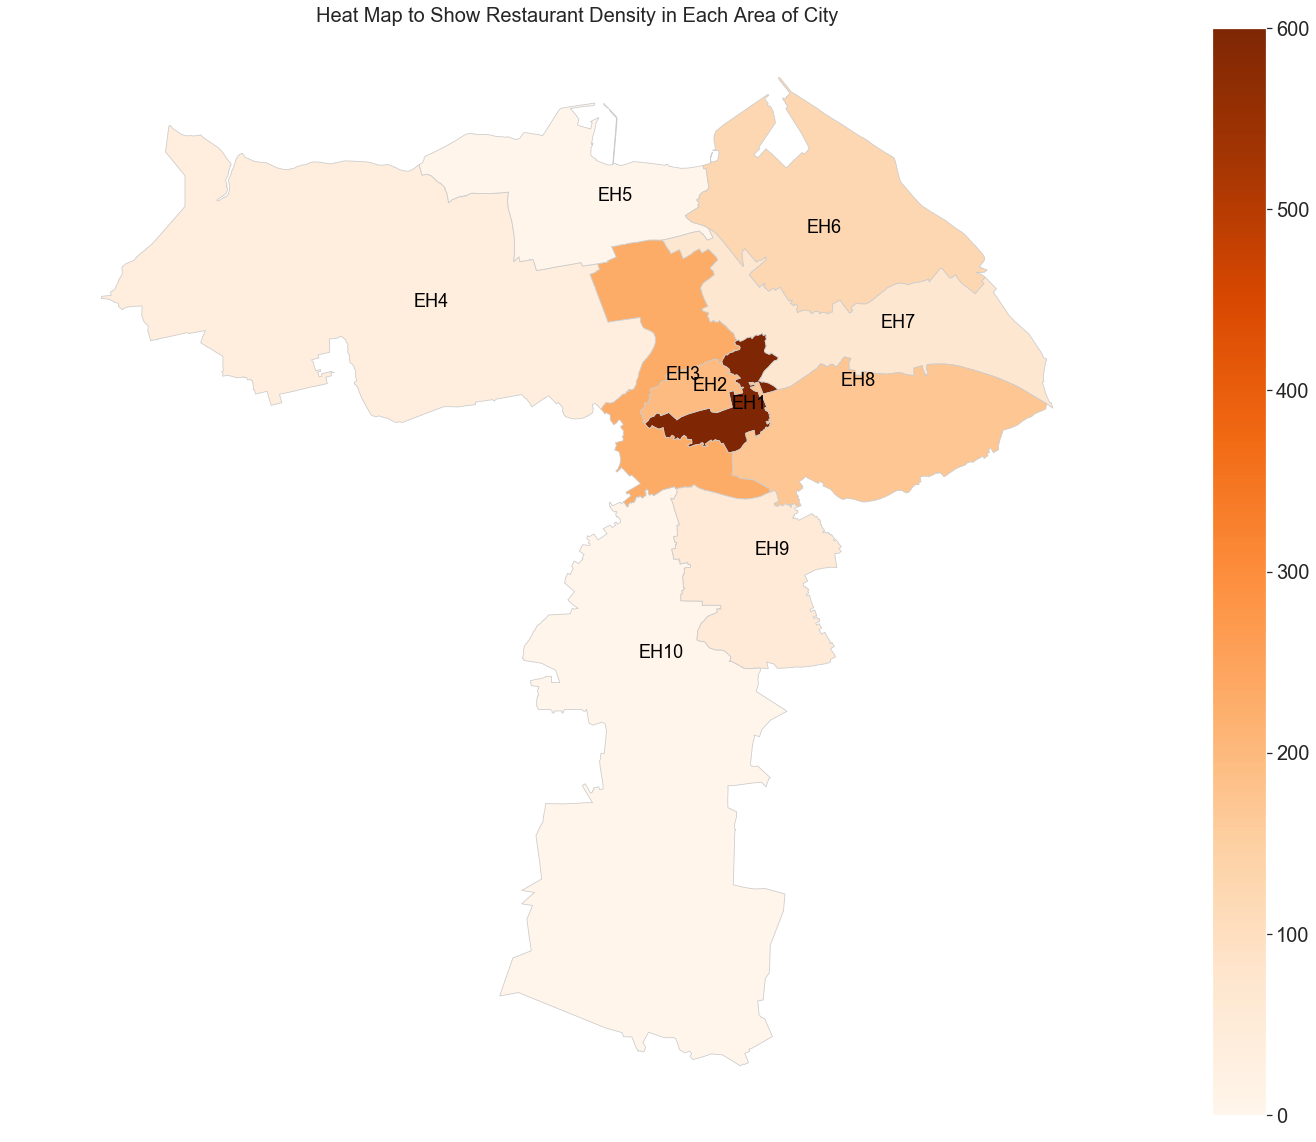

In [99]:
fig, ax = plt.subplots(1, figsize=(40,20))
ax.axis('off')
ax.set_title('Heat Map to Show Restaurant Density in Each Area of City', fontsize=20);

color = 'Oranges'
vmin, vmax = 0, 600
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

geo_merged.plot('counter', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

for idx, row in geo_merged.iterrows():
    if(row['counter']>0):
        plt.annotate(s=row['PostDist'], xy=(row['x'], row['y']),
                    horizontalalignment='left', fontsize=18, color='black', wrap=True)
        
        
plt.show()

Create map to show relative density of restaurants by rating!

In [102]:
print(geo_df.shape)
geo_df.head(2)

(1508, 13)


,DistID,PostDist,Locale,geometry,x,y,business_id,name,latitude,longitude,postal_area,stars,review_count
0,689,EH1,Old Town,"POLYGON ((324508.097 673513.308, 324552.200 67...",325688,673712,inaACfObL1NBNJmBG11iuQ,"""Global Deli""",55.94796,-3.192143,EH1,4.0,13.0
1,689,EH1,Old Town,"POLYGON ((324508.097 673513.308, 324552.200 67...",325688,673712,eSQt_QNjxNEYN3bF1fHbQg,"""Monster Mash""",55.94580,-3.191100,EH1,3.5,25.0


In [132]:
print(geo_df['latitude'].describe())

count    1508.000000
mean       55.675982
std         4.160798
min         0.000000
25%        55.943758
50%        55.949725
75%        55.956393
max        89.999314
Name: latitude, dtype: float64


In [170]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [109]:
world.continent.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [186]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


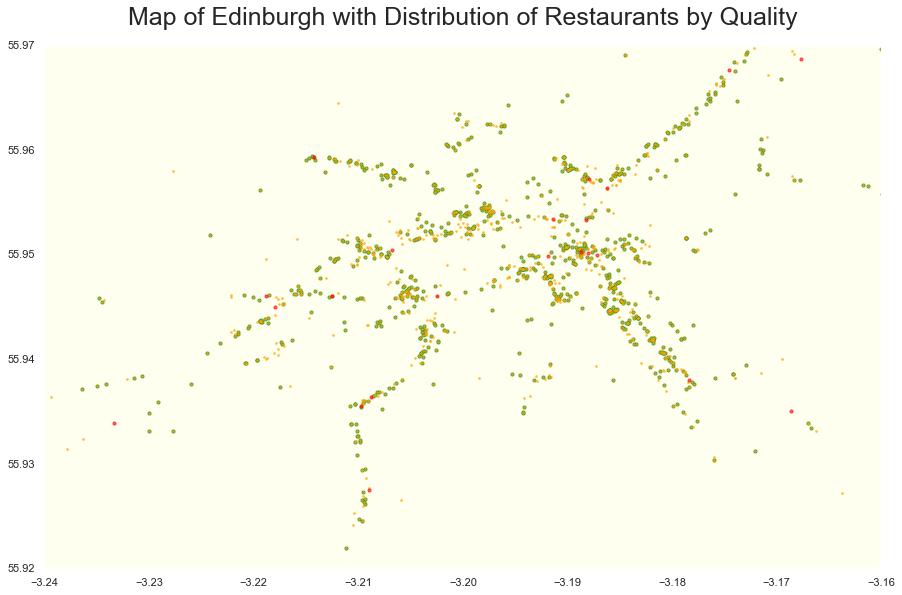

In [168]:
from pylab import rcParams
gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df.longitude, geo_df.latitude))

rcParams['figure.figsize'] = 15,15

amazing = gdf.where(gdf['stars'] >= 3.5) #these variables need a function to return the correct scatter.
okay = gdf.where(gdf['stars'] >= 2.5) 
bad = gdf.where(gdf['stars'] < 2.5)

ax = world[world.continent == 'Europe'].plot(color='ivory', edgecolor='black')

ax.scatter(great['longitude'], great['latitude'], c='green', alpha=0.6, s=10)
ax.scatter(okay['longitude'], okay['latitude'], c='orange', alpha=0.6, s=3)
ax.scatter(bad['longitude'], bad['latitude'], c='red', alpha=0.6, s=10)

plt.title('Map of Edinburgh with Distribution of Restaurants by Quality', fontsize=25, pad=20)

plt.ylim(55.92,55.97)
plt.xlim(-3.24,-3.16)


plt.show()